In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dependencies
import gym
import gym_anytrading

from gym_anytrading.envs import StocksEnvLog

In [3]:
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [4]:
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
import tensorflow
print(tensorflow.__version__)

2.8.1


In [6]:
import quantstats as qs

In [7]:
#loading our dataset
df = pd.read_csv('../../data/binance_BTCUSDT_1h_from_2020_01_01_to_2022_09_30_candlesticks_signals_processed_technical_indicators_and_crypto_index.csv')
#viewing first 5 columns
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
0,1578268800000,7357.64,7384.72,7346.76,7378.75,1358.867787,1578272399999,1.000665e+07,10399,712.183975,...,7358.112084,19912.415403,42.216983,18.324288,7466.008435,1.003681,0.998521,1.002869,0.002718,1002.717853
1,1578272400000,7378.97,7426.82,7368.55,7423.50,1630.227541,1578275999999,1.204807e+07,14099,917.223564,...,7357.755635,21356.874781,43.363627,17.869168,7457.127929,1.006485,0.998588,1.006035,0.006065,1008.799049
2,1578276000000,7423.06,7562.00,7421.64,7551.44,5819.256972,1578279599999,4.366371e+07,38256,3402.178628,...,7344.217387,26300.506879,50.291939,17.479081,7318.000000,1.018717,0.999809,1.017295,0.017234,1026.185154
3,1578279600000,7551.47,7580.00,7486.85,7540.90,4769.906356,1578283199999,3.593969e+07,27817,2222.120771,...,7336.567145,27066.047406,53.353229,17.115744,7322.880000,1.003778,0.991443,0.998600,-0.001396,1024.752845
4,1578283200000,7540.90,7554.61,7516.06,7529.52,1554.582461,1578286799999,1.171094e+07,13475,854.354945,...,7333.356615,26597.051452,52.295856,16.755815,7333.164800,1.001818,0.996706,0.998491,-0.001509,1023.206387


In [8]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volumne', 'number_of_trades',
       'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore',
       'formatted_open_time', 'formatted_close_time', 'upper_shadow',
       'lower_shadow', 'real_body', 'CDLINVERTEDHAMMER', 'CDLHAMMER',
       'CDLPIERCING', 'CDLMORNINGSTAR', 'CDLSHOOTINGSTAR', 'CDLHANGINGMAN',
       'CDLDARKCLOUDCOVER', 'CDLEVENINGSTAR', 'CDLENGULFING',
       'CDLENGULFINGBULLISH', 'CDLENGULFINGBEARISH', 'CDLINVERTEDHAMMER_NEW',
       'CDLHAMMER_NEW', 'CDLPIERCING_NEW', 'CDLMORNINGSTAR_NEW',
       'CDLENGULFINGBULLISH_NEW', 'CDLSHOOTINGSTAR_NEW', 'CDLHANGINGMAN_NEW',
       'CDLDARKCLOUDCOVER_NEW', 'CDLEVENINGSTAR_NEW',
       'CDLENGULFINGBEARISH_NEW', 'MA5', 'MA10', 'MA20', 'MA60', 'MA120',
       'volume_MA5', 'volume_MA10', 'volume_MA20', 'SMA5', 'SMA10', 'SMA20',
       'SMA60', 'SMA120', 'volume_SMA5', 'volume_SMA10', 'volume_SMA20',
       'WMA5', 'W

In [9]:
#converting Date Column to DateTime Type
df['Date'] = pd.to_datetime(df['formatted_open_time'])
df.dtypes

open_time                        int64
open                           float64
high                           float64
low                            float64
close                          float64
                             ...      
ratio_low_open                 float64
ratio_close_open               float64
time_to_chart_return           float64
crypto_index                   float64
Date                    datetime64[ns]
Length: 91, dtype: object

In [10]:
#setting the column as index
df.set_index('Date', inplace=True)
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06 00:00:00,1578268800000,7357.64,7384.72,7346.76,7378.75,1358.867787,1578272399999,1.000665e+07,10399,712.183975,...,7358.112084,19912.415403,42.216983,18.324288,7466.008435,1.003681,0.998521,1.002869,0.002718,1002.717853
2020-01-06 01:00:00,1578272400000,7378.97,7426.82,7368.55,7423.50,1630.227541,1578275999999,1.204807e+07,14099,917.223564,...,7357.755635,21356.874781,43.363627,17.869168,7457.127929,1.006485,0.998588,1.006035,0.006065,1008.799049
2020-01-06 02:00:00,1578276000000,7423.06,7562.00,7421.64,7551.44,5819.256972,1578279599999,4.366371e+07,38256,3402.178628,...,7344.217387,26300.506879,50.291939,17.479081,7318.000000,1.018717,0.999809,1.017295,0.017234,1026.185154
2020-01-06 03:00:00,1578279600000,7551.47,7580.00,7486.85,7540.90,4769.906356,1578283199999,3.593969e+07,27817,2222.120771,...,7336.567145,27066.047406,53.353229,17.115744,7322.880000,1.003778,0.991443,0.998600,-0.001396,1024.752845
2020-01-06 04:00:00,1578283200000,7540.90,7554.61,7516.06,7529.52,1554.582461,1578286799999,1.171094e+07,13475,854.354945,...,7333.356615,26597.051452,52.295856,16.755815,7333.164800,1.001818,0.996706,0.998491,-0.001509,1023.206387


In [11]:
#df_selected_columns = df[['close', 'volume', 'CCI_14', 'ADX_14', 'ADXR_14', 'MACD_12_26_9', 'RSI_14']]
df_selected_columns = df

In [12]:
df_selected_columns

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06 00:00:00,1578268800000,7357.64,7384.72,7346.76,7378.75,1358.867787,1578272399999,1.000665e+07,10399,712.183975,...,7358.112084,1.991242e+04,42.216983,18.324288,7466.008435,1.003681,0.998521,1.002869,0.002718,1002.717853
2020-01-06 01:00:00,1578272400000,7378.97,7426.82,7368.55,7423.50,1630.227541,1578275999999,1.204807e+07,14099,917.223564,...,7357.755635,2.135687e+04,43.363627,17.869168,7457.127929,1.006485,0.998588,1.006035,0.006065,1008.799049
2020-01-06 02:00:00,1578276000000,7423.06,7562.00,7421.64,7551.44,5819.256972,1578279599999,4.366371e+07,38256,3402.178628,...,7344.217387,2.630051e+04,50.291939,17.479081,7318.000000,1.018717,0.999809,1.017295,0.017234,1026.185154
2020-01-06 03:00:00,1578279600000,7551.47,7580.00,7486.85,7540.90,4769.906356,1578283199999,3.593969e+07,27817,2222.120771,...,7336.567145,2.706605e+04,53.353229,17.115744,7322.880000,1.003778,0.991443,0.998600,-0.001396,1024.752845
2020-01-06 04:00:00,1578283200000,7540.90,7554.61,7516.06,7529.52,1554.582461,1578286799999,1.171094e+07,13475,854.354945,...,7333.356615,2.659705e+04,52.295856,16.755815,7333.164800,1.001818,0.996706,0.998491,-0.001509,1023.206387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29 20:00:00,1664481600000,19402.63,19540.71,19379.74,19505.64,9727.755830,1664485199999,1.891630e+08,138946,5033.583510,...,19108.190565,3.084011e+06,243.499672,27.545276,18905.310328,1.007117,0.998820,1.005309,0.005167,2650.673008
2022-09-29 21:00:00,1664485200000,19507.09,19520.00,19417.87,19430.15,5310.548320,1664488799999,1.034403e+08,88667,2479.320390,...,19109.193920,3.079977e+06,233.401838,26.313528,18920.114521,1.000662,0.995426,0.996056,-0.003870,2640.414473
2022-09-29 22:00:00,1664488800000,19431.42,19539.56,19417.88,19456.07,11951.949720,1664492399999,2.327848e+08,136925,5826.494770,...,19109.118454,3.075528e+06,225.421707,26.274076,18934.622631,1.005565,0.999303,1.001269,0.001334,2643.936810


In [13]:
window_size = 5 * 24
start_date_id = int(df_selected_columns.index.get_loc('2020-05-06 00:00:00'))
mid_date_id = int(df_selected_columns.index.get_loc('2022-03-30 00:00:00'))
end_date_id = int(df_selected_columns.index.get_loc('2022-09-30 00:00:00'))

In [14]:
print(f'start_date_id:{start_date_id}')
print(f'mid_date_id:{mid_date_id}')
print(f'end_date_id:{end_date_id}')

start_date_id:2895
mid_date_id:19505
end_date_id:23921


In [15]:
print(f'mid_date_id - start_date_id: {mid_date_id - start_date_id}')
print(f'end_date_id - mid_date_id: {end_date_id - mid_date_id}')
print(f'end_date_id - start_date_id: {end_date_id - start_date_id}')

mid_date_id - start_date_id: 16610
end_date_id - mid_date_id: 4416
end_date_id - start_date_id: 21026


In [16]:
df_selected_columns.shape

(23922, 90)

In [17]:
# check prices
#df_selected_columns.loc[:, 'close'].to_numpy()[start_date_id-window_size:mid_date_id]

In [18]:
#df_selected_columns.loc[:, 'close'].to_numpy()[start_date_id - window_size + 6]

In [19]:
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'close'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['volume', 'CCI_14', 'ADX_14', 'ADXR_14', 'MACD_12_26_9', 'RSI_14']].to_numpy()[start:end]
    return prices, signal_features


class MyEnv(StocksEnvLog):
    _process_data = my_process_data

In [20]:
#passing the data and creating our environment
env = MyEnv(df=df_selected_columns, frame_bound=(start_date_id,mid_date_id), window_size=window_size)

info {'total_reward': -16611.03999999971, 'total_profit': 1.039975703203774, 'position': 0}


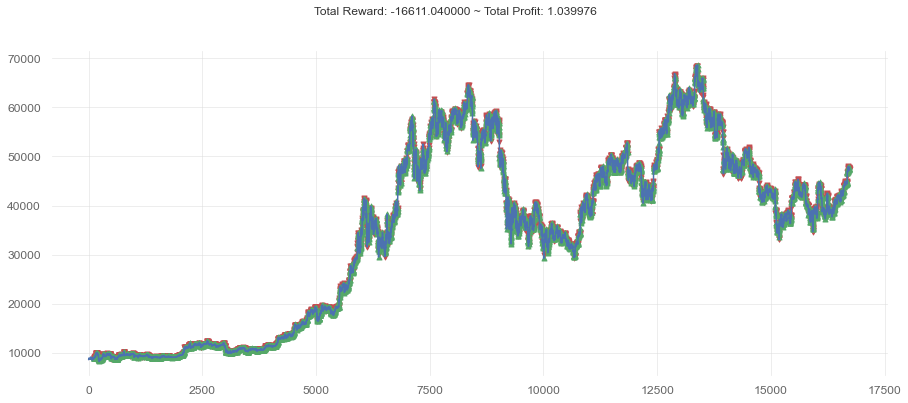

In [21]:
#running the test environment
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [22]:
#setting up our environment for training 
env_maker = lambda: MyEnv(df=df_selected_columns, frame_bound=(start_date_id,mid_date_id), window_size=window_size)
env = DummyVecEnv([env_maker])

#Applying the Trading RL Algorithm
model = A2C('MlpPolicy', env, verbose=1) 
 
#setting the learning timesteps
#model.learn(total_timesteps=1000)
model.learn(total_timesteps=(mid_date_id - start_date_id))

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 305      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.589   |
|    explained_variance | 0.0247   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -16.5    |
|    value_loss         | 1.07e+03 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 308      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.552   |
|    explained_variance | 0.00141  |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 5.65     |
|    value_loss      

In [23]:
#Setting up the Agent Environment
env = MyEnv(df=df_selected_columns, frame_bound=(mid_date_id,end_date_id), window_size=window_size)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -32248.120000000075, 'total_profit': 0.32705759551857166, 'position': 1}


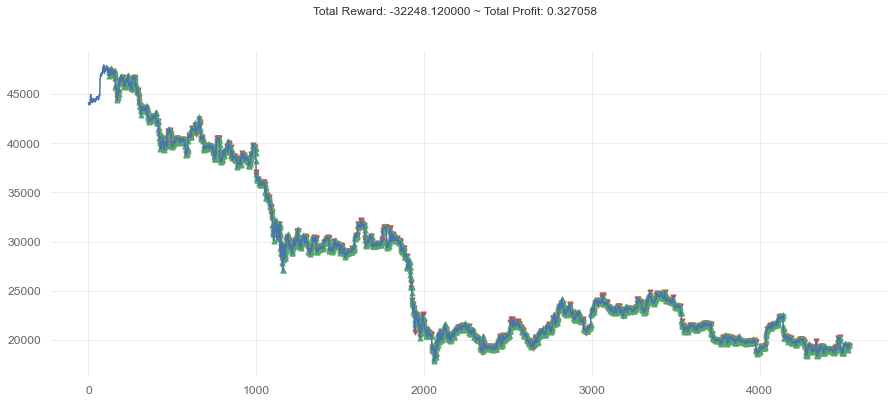

In [24]:
#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [25]:
len(env.history['total_profit'])

4415

                           Strategy
-------------------------  ----------
Start Period               2022-03-30
End Period                 2022-09-29
Risk-Free Rate             0.0%
Time in Market             20.0%

Cumulative Return          -67.29%
CAGR﹪                     -89.24%

Sharpe                     -0.56
Prob. Sharpe Ratio         0.82%
Smart Sharpe               -0.56
Sortino                    -0.71
Smart Sortino              -0.71
Sortino/√2                 -0.5
Smart Sortino/√2           -0.5
Omega                      0.77

Max Drawdown               -69.39%
Longest DD Days            176
Volatility (ann.)          10.43%
Calmar                     -1.29
Skew                       -1.87
Kurtosis                   52.02

Expected Daily %           -0.03%
Expected Monthly %         -14.76%
Expected Yearly %          -67.29%
Kelly Criterion            -15.05%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.1%
Expected Shortfall (cVaR)  -1.1%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-04-06,2022-09-28,2022-09-29,176,-69.390582,-68.792407
2,2022-03-31,2022-04-01,2022-04-02,2,-3.711277,-3.169607
3,2022-04-02,2022-04-04,2022-04-05,2,-2.410588,-1.861021
4,2022-03-30,2022-03-30,2022-03-31,0,-0.519908,-0.349477


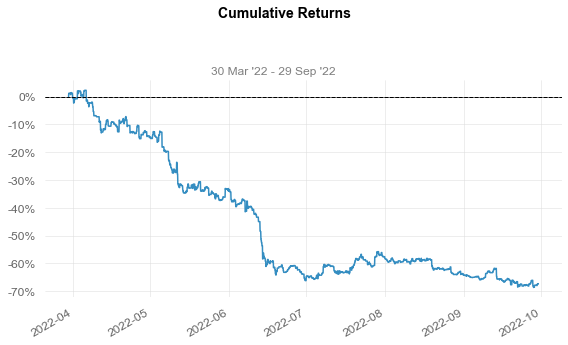

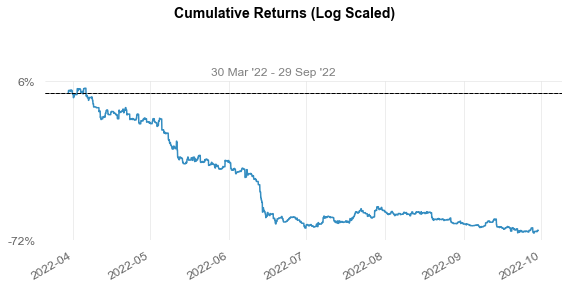

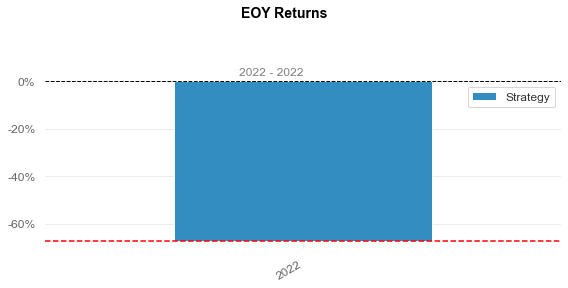

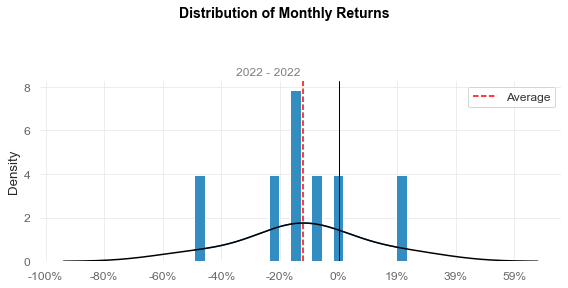

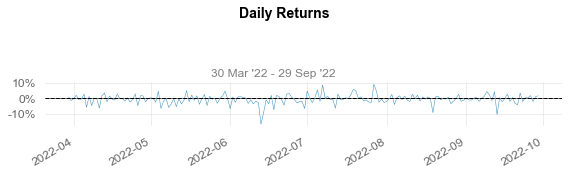

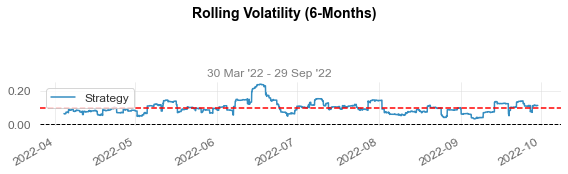

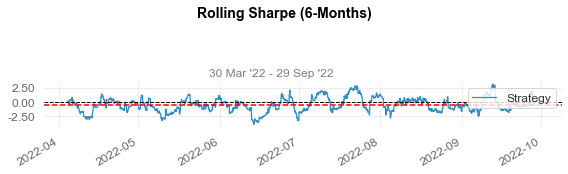

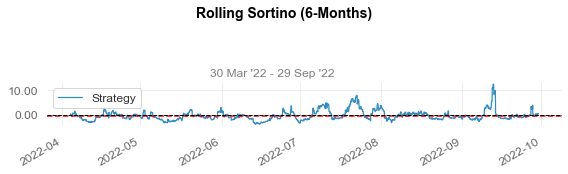

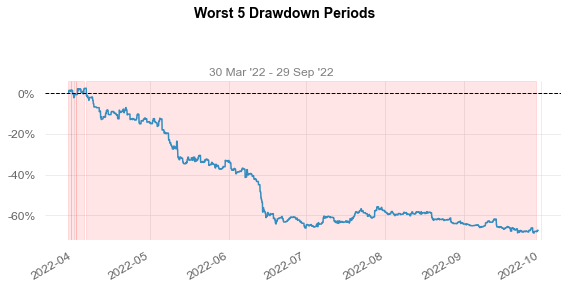

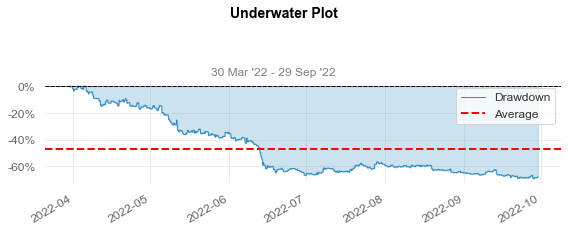

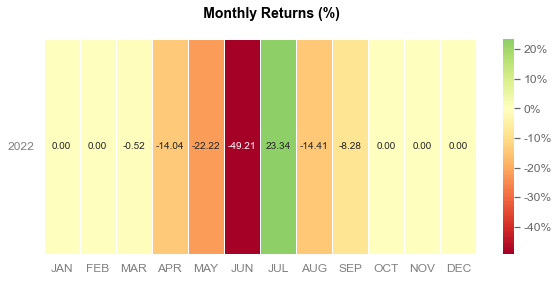

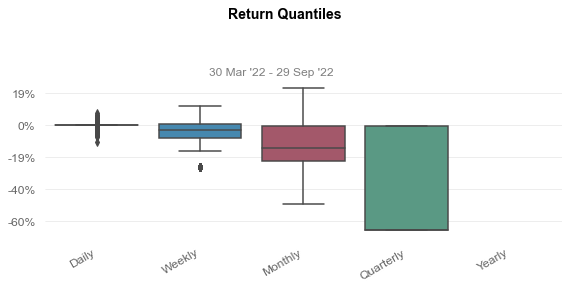

In [26]:
qs.extend_pandas()

start_index = mid_date_id
end_index = end_date_id

net_worth = pd.Series(env.history['total_profit'], index=df_selected_columns.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

In [ ]:
window_size = 5 * 24
start_date_id = int(df_selected_columns.index.get_loc('2020-05-06 00:00:00'))
mid_date_id = int(df_selected_columns.index.get_loc('2022-03-30 00:00:00'))
end_date_id = int(df_selected_columns.index.get_loc('2022-09-30 00:00:00'))

In [27]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volumne,number_of_trades,taker_buy_base_asset_volume,...,BBANDS_L,AD,ATR,HT_DC,SAR,ratio_high_open,ratio_low_open,ratio_close_open,time_to_chart_return,crypto_index
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06 00:00:00,1578268800000,7357.64,7384.72,7346.76,7378.75,1358.867787,1578272399999,1.000665e+07,10399,712.183975,...,7358.112084,19912.415403,42.216983,18.324288,7466.008435,1.003681,0.998521,1.002869,0.002718,1002.717853
2020-01-06 01:00:00,1578272400000,7378.97,7426.82,7368.55,7423.50,1630.227541,1578275999999,1.204807e+07,14099,917.223564,...,7357.755635,21356.874781,43.363627,17.869168,7457.127929,1.006485,0.998588,1.006035,0.006065,1008.799049
2020-01-06 02:00:00,1578276000000,7423.06,7562.00,7421.64,7551.44,5819.256972,1578279599999,4.366371e+07,38256,3402.178628,...,7344.217387,26300.506879,50.291939,17.479081,7318.000000,1.018717,0.999809,1.017295,0.017234,1026.185154
2020-01-06 03:00:00,1578279600000,7551.47,7580.00,7486.85,7540.90,4769.906356,1578283199999,3.593969e+07,27817,2222.120771,...,7336.567145,27066.047406,53.353229,17.115744,7322.880000,1.003778,0.991443,0.998600,-0.001396,1024.752845
2020-01-06 04:00:00,1578283200000,7540.90,7554.61,7516.06,7529.52,1554.582461,1578286799999,1.171094e+07,13475,854.354945,...,7333.356615,26597.051452,52.295856,16.755815,7333.164800,1.001818,0.996706,0.998491,-0.001509,1023.206387
